# Data visualization - Pretraining

File loaded. Main shape (list of objects): (8442,)
Total images (objects) in file: 8442
Displaying first image with shape: (51, 51)


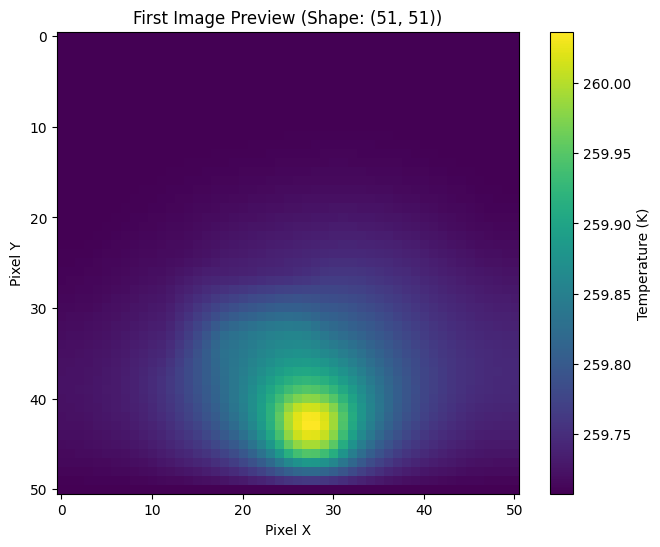

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_name = 'data/pretraining/temperature_array_list.npy'

# allow_pickle=True is required to load 'object' arrays
try:
    data = np.load(file_name, allow_pickle=True)

    print(f"File loaded. Main shape (list of objects): {data.shape}")
    print(f"Total images (objects) in file: {len(data)}")

    if len(data) > 0 and isinstance(data[0], np.ndarray):
        
        first_image = data[0] # Get the first array (image)
        
        if first_image.size > 0:
            print(f"Displaying first image with shape: {first_image.shape}")

            plt.figure(figsize=(8, 6))
            
            plt.imshow(first_image, cmap='viridis') 
            
            # Add a color bar to show the temperature scale
            plt.colorbar(label='Temperature (K)') 
            
            plt.title(f'First Image Preview (Shape: {first_image.shape})')
            plt.xlabel('Pixel X')
            plt.ylabel('Pixel Y')
            
            plt.show()

            # --- Save the image as a PNG file ---
            # save_path = 'my_first_image.png'
            # plt.imsave(save_path, first_image, cmap='viridis')
            # print(f"Image saved to {save_path}")

        else:
            print("The first image (data[0]) is empty (shape is (0, 0)).")
            
    else:
        print("The file seems to be empty or the first item is not a NumPy array.")


except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")